In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

DATA_RAW = os.path.join(PROJECT_ROOT, "data_raw")
DATA_PROCESSED = os.path.join(PROJECT_ROOT, "data_processed")
MODELS_DIR = os.path.join(PROJECT_ROOT, "models")

for path in [DATA_RAW, DATA_PROCESSED, MODELS_DIR]:
    os.makedirs(path, exist_ok=True)

PROJECT_ROOT, DATA_RAW, DATA_PROCESSED, MODELS_DIR

('c:\\Users\\Shamendry\\OneDrive\\Final Year Project\\Debtor Risk Management',
 'c:\\Users\\Shamendry\\OneDrive\\Final Year Project\\Debtor Risk Management\\data_raw',
 'c:\\Users\\Shamendry\\OneDrive\\Final Year Project\\Debtor Risk Management\\data_processed',
 'c:\\Users\\Shamendry\\OneDrive\\Final Year Project\\Debtor Risk Management\\models')

In [3]:
print("DATA_RAW path:", DATA_RAW)
files = [f for f in os.listdir(DATA_RAW) if f.lower().endswith((".xlsx", ".xls"))]
files


DATA_RAW path: c:\Users\Shamendry\OneDrive\Final Year Project\Debtor Risk Management\data_raw


['Debtor_Data_Anon.xlsx', 'Sales_Data_Anon.xlsx']

In [4]:
debtor_file = os.path.join(DATA_RAW, "Debtor_Data_Anon.xlsx")
sales_file  = os.path.join(DATA_RAW, "Sales_Data_Anon.xlsx")

debtor_xl = pd.ExcelFile(debtor_file)
sales_xl  = pd.ExcelFile(sales_file)

print("Debtor sheets:", debtor_xl.sheet_names)
print("Sales sheets :", sales_xl.sheet_names)

Debtor sheets: ['Company', 'Customer master', 'Product master', 'Customer Outstanding']
Sales sheets : ['Salesmaster']


In [5]:
#Loading the Key Sheets
DEBTOR_SHEET = "Customer Outstanding"
SALES_SHEET  = "Salesmaster"

debtor_df = pd.read_excel(debtor_file, sheet_name=DEBTOR_SHEET)
sales_df  = pd.read_excel(sales_file,  sheet_name=SALES_SHEET)

print("Debtor shape:", debtor_df.shape)
print("Sales shape :", sales_df.shape)

debtor_df.head(3)

Debtor shape: (6306, 23)
Sales shape : (1048575, 70)


,Type,CustomerID,CusCode,CustomerName,SubLedgerCode,Term,Country,DOCID,DOCDate,Currency,OutstandingNative,USDExrate,OutstandingUSD,OutstandingLKR,DueDate,OverdueDurationDays,Comments,REFBLlDate,OnboardDate,RefNo,ContractNo,CompanyCode,RBLA
0,Outstanding,13591000000260,10005,Sencha Palm Trading,10005-DCTC-USD,45 DAYS DIRECT,UNITED ARAB EMIRATES,DCTC/10008515 -Invoice,45811,USD,1275.00,295.3567,1275.00,376579.8,45862.0,80,NaN,NaN,45817.0,1012791,1341220000393,DCTC,114217.36
1,Outstanding,13591000000260,10005,Sencha Palm Trading,10005-DCTC-USD,45 DAYS DIRECT,UNITED ARAB EMIRATES,DCTC/10008480 -Invoice,45799,USD,8136.10,296.2017,8136.10,2409926.7,45855.0,87,NaN,NaN,45810.0,"1012689,1012690,1012692,1012693,1012699,1012708",1714440002076,DCTC,114217.36
2,Outstanding,13591000000324,10038,Darjeeling Jasmine Tea Works,10038-DCTC-USD,60 DAYS DIRECT,UNITED ARAB EMIRATES,DCTC/10008526 -Invoice,45814,USD,15012.66,295.1542,15012.66,4431049.7,45878.0,64,NaN,NaN,45818.0,1012740,1379990000481,DCTC,30135.39


In [6]:
sales_df.head(3)

,DocumentDateKey,CompanyId,Companyname,CustomerId,CusCode,CustomerClassification,Customer,Region,Country,InvoiceNo,InvoiceDate,DueDate,SONo,SODate,GDNNo,GDNDate,GDNQty,ShipmentNo,ETA,DETA,VesselName,PromiseDate,POD,CT,Brand,SubBrand,Range,Product,ProductId,ProductCode,ProductGroup,CostOfGoodSold_LKR,CostOfGoodSold_USD,NoOfCups,NoOfInners,VolumeRT,VolumeFS,VolumeEcom,InvoicedQty,NetWeightRT,NetWeightFS,NetWeightEcom,NetWeight,ValueRT,ValueFS,ValueEcom,FOBRate,DiscountAmt,Free,USDExrate,ValueRT_USD,ValueFS_USD,ValueEcom_USD,USDFOBValue,Currency,fobvalue,TaxAmount,NetAmount,LKRValue,CostRate,Remarks_Status,OIHCases,OIHValue,OIHCups,OIHKg,OIHInners,ReturnRetail,ReturnFS,ReturnEcom,SalesType
0,20190304,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,MJE/LSO/006825,2019-03-04,MJE/LGDN/006590,2019-03-04,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 ROSEHIP,13758000003850,80440-012-R00-SRL-LMK-0020FE-1.5G-RH,RETAIL,1094.551405,6.153746,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,177.8675,0.0,0.0,0.0,14.259322,LKR,2536.27,0.0,2536.27,2536.27,1094.551405,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales
1,20180522,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LINV/000708,2018-05-22,2018-07-21,MJE/LSO/000990,2018-05-22,MJE/LGDN/000709,2018-05-22,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 PEPPERMINT,13758000005990,80434-012-R00-SRL-LMK-0020FE-1.5G-PM,RETAIL,730.911806,4.678653,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,156.2227,0.0,0.0,0.0,16.234965,LKR,2536.27,0.0,2536.27,2536.27,730.911806,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales
2,20190304,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,MJE/LSO/006825,2019-03-04,MJE/LGDN/006590,2019-03-04,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 PEPPERMINT,13758000005990,80434-012-R00-SRL-LMK-0020FE-1.5G-PM,RETAIL,968.391500,5.444454,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,177.8675,0.0,0.0,0.0,14.259322,LKR,2536.27,0.0,2536.27,2536.27,968.391500,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales


In [7]:
print("Debtor columns:\n", list(debtor_df.columns))
print("\nSales columns:\n", list(sales_df.columns))

Debtor columns:
 ['Type', 'CustomerID', 'CusCode', 'CustomerName', 'SubLedgerCode', 'Term', 'Country', 'DOCID', 'DOCDate', 'Currency', 'OutstandingNative', 'USDExrate', 'OutstandingUSD', 'OutstandingLKR', 'DueDate', 'OverdueDurationDays', 'Comments', 'REFBLlDate', 'OnboardDate', 'RefNo', 'ContractNo', 'CompanyCode', 'RBLA']

Sales columns:
 ['DocumentDateKey', 'CompanyId', 'Companyname', 'CustomerId', 'CusCode', 'CustomerClassification', 'Customer', 'Region', 'Country', 'InvoiceNo', 'InvoiceDate', 'DueDate', 'SONo', 'SODate', 'GDNNo', 'GDNDate', 'GDNQty', 'ShipmentNo', 'ETA', 'DETA', 'VesselName', 'PromiseDate', 'POD', 'CT', 'Brand', 'SubBrand', 'Range', 'Product', 'ProductId', 'ProductCode', 'ProductGroup', 'CostOfGoodSold_LKR', 'CostOfGoodSold_USD', 'NoOfCups', 'NoOfInners', 'VolumeRT', 'VolumeFS', 'VolumeEcom', 'InvoicedQty', 'NetWeightRT', 'NetWeightFS', 'NetWeightEcom', 'NetWeight', 'ValueRT', 'ValueFS', 'ValueEcom', 'FOBRate', 'DiscountAmt', 'Free', 'USDExrate', 'ValueRT_USD', 'V

In [8]:
#Quick Profiling for Any Hidden Issues
def quick_profile(df, name):
    print(f"\n--- {name} ---")
    print("Rows, Cols:", df.shape)
    print("Missing values (top 15):")
    print(df.isna().sum().sort_values(ascending=False).head(15))
    print("\nDtypes (top 15):")
    print(df.dtypes.head(15))

quick_profile(debtor_df, "DEBTOR (Customer Outstanding)")
quick_profile(sales_df, "SALES (Salesmaster)")


--- DEBTOR (Customer Outstanding) ---
Rows, Cols: (6306, 23)
Missing values (top 15):
Comments               6127
REFBLlDate             5828
ContractNo             5718
OnboardDate            5718
DueDate                 861
RefNo                   723
USDExrate                40
OutstandingUSD           40
CompanyCode               0
OverdueDurationDays       0
OutstandingLKR            0
Type                      0
CustomerID                0
OutstandingNative         0
Currency                  0
dtype: int64

Dtypes (top 15):
Type                  object
CustomerID             int64
CusCode                int64
CustomerName          object
SubLedgerCode         object
Term                  object
Country               object
DOCID                 object
DOCDate                int64
Currency              object
OutstandingNative    float64
USDExrate            float64
OutstandingUSD       float64
OutstandingLKR       float64
DueDate              float64
dtype: object

--- SALES (S

In [9]:
debtor_cols_lower = set(c.strip().lower() for c in debtor_df.columns.astype(str))
sales_cols_lower  = set(c.strip().lower() for c in sales_df.columns.astype(str))

common_cols = sorted(debtor_cols_lower.intersection(sales_cols_lower))

common_cols[:30], len(common_cols)

(['country', 'currency', 'cuscode', 'customerid', 'duedate', 'usdexrate'], 6)

In [10]:
#Cleaning & Standardizng
def clean_columns(df):
    df.columns = (
        df.columns
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )
    return df

debtor_df = clean_columns(debtor_df)
sales_df  = clean_columns(sales_df)

print("Debtor columns (cleaned):")
print(debtor_df.columns)

print("\nSales columns (cleaned):")
print(sales_df.columns)

Debtor columns (cleaned):
Index(['type', 'customerid', 'cuscode', 'customername', 'subledgercode', 'term', 'country', 'docid', 'docdate', 'currency', 'outstandingnative', 'usdexrate', 'outstandingusd', 'outstandinglkr',
       'duedate', 'overduedurationdays', 'comments', 'refblldate', 'onboarddate', 'refno', 'contractno', 'companycode', 'rbla'],
      dtype='object')

Sales columns (cleaned):
Index(['documentdatekey', 'companyid', 'companyname', 'customerid', 'cuscode', 'customerclassification', 'customer', 'region', 'country', 'invoiceno', 'invoicedate', 'duedate', 'sono', 'sodate',
       'gdnno', 'gdndate', 'gdnqty', 'shipmentno', 'eta', 'deta', 'vesselname', 'promisedate', 'pod', 'ct', 'brand', 'subbrand', 'range', 'product', 'productid', 'productcode', 'productgroup',
       'costofgoodsold_lkr', 'costofgoodsold_usd', 'noofcups', 'noofinners', 'volumert', 'volumefs', 'volumeecom', 'invoicedqty', 'netweightrt', 'netweightfs', 'netweightecom', 'netweight',
       'valuert', 'valuef

In [11]:
#Fixing Key Identifier Types
debtor_df["customerid"] = debtor_df["customerid"].astype(str)
debtor_df["cuscode"]    = debtor_df["cuscode"].astype(str)

sales_df["customerid"] = sales_df["customerid"].astype(str)
sales_df["cuscode"]    = sales_df["cuscode"].astype(str)

In [12]:
#Ensuring data columns are datetime
date_cols_debtor = ["duedate", "sodate", "onboarddate", "refblldate"]
date_cols_sales  = ["duedate", "sodate"]

for col in date_cols_debtor:
    if col in debtor_df.columns:
        debtor_df[col] = pd.to_datetime(debtor_df[col], errors="coerce")

for col in date_cols_sales:
    if col in sales_df.columns:
        sales_df[col] = pd.to_datetime(sales_df[col], errors="coerce")

In [13]:
#Validation
print(debtor_df[["customerid", "cuscode", "duedate"]].head())
print(sales_df[["customerid", "cuscode", "duedate"]].head())

       customerid cuscode                       duedate
0  13591000000260   10005 1970-01-01 00:00:00.000045862
1  13591000000260   10005 1970-01-01 00:00:00.000045855
2  13591000000324   10038 1970-01-01 00:00:00.000045878
3  13591000000410   10088 1970-01-01 00:00:00.000045699
4  13591000000410   10088 1970-01-01 00:00:00.000045775
       customerid cuscode    duedate
0  13591000000486   10131 2019-05-03
1  13591000000486   10131 2018-07-21
2  13591000000486   10131 2019-05-03
3  13591000000486   10131 2022-12-12
4  13591000000486   10131 2022-12-25


In [14]:
debtor_df["duedate"].head(10)

0   1970-01-01 00:00:00.000045862
1   1970-01-01 00:00:00.000045855
2   1970-01-01 00:00:00.000045878
3   1970-01-01 00:00:00.000045699
4   1970-01-01 00:00:00.000045775
5   1970-01-01 00:00:00.000045725
6   1970-01-01 00:00:00.000045868
7   1970-01-01 00:00:00.000045997
8   1970-01-01 00:00:00.000045637
9   1970-01-01 00:00:00.000044920
Name: duedate, dtype: datetime64[ns]

In [15]:
# Convert wrongly-parsed datetime back to numeric days
debtor_df["duedate_numeric"] = (
    debtor_df["duedate"] - pd.Timestamp("1970-01-01")
).dt.total_seconds() / 86400


In [16]:
debtor_df["duedate"] = pd.to_datetime(
    debtor_df["duedate_numeric"],
    unit="D",
    origin="1899-12-30",
    errors="coerce"
)

In [17]:
debtor_df.drop(columns=["duedate_numeric"], inplace=True)

In [18]:
debtor_df[["customerid", "cuscode", "duedate"]].head(10)

,customerid,cuscode,duedate
0,13591000000260,10005,1899-12-30 00:00:00.000086400
1,13591000000260,10005,1899-12-30 00:00:00.000086400
2,13591000000324,10038,1899-12-30 00:00:00.000086400
3,13591000000410,10088,1899-12-30 00:00:00.000086400
4,13591000000410,10088,1899-12-30 00:00:00.000086400
5,13591000000410,10088,1899-12-30 00:00:00.000086400
6,13591000000410,10088,1899-12-30 00:00:00.000086400
7,13591000000410,10088,1899-12-30 00:00:00.000086400
8,13591000000410,10088,1899-12-30 00:00:00.000086400
9,13591000002018,11249,1899-12-30 00:00:00.000086400


In [19]:
#Searching for date-like columns by name
[c for c in debtor_df.columns if "date" in c.lower()]

['docdate', 'duedate', 'refblldate', 'onboarddate']

In [20]:
#Checking which columns are actually datetime and not all-null
date_cols = [c for c in debtor_df.columns if np.issubdtype(debtor_df[c].dtype, np.datetime64)]
date_cols, {c: debtor_df[c].notna().sum() for c in date_cols}

(['duedate', 'refblldate', 'onboarddate'],
 {'duedate': 5445, 'refblldate': 478, 'onboarddate': 588})

In [21]:
#Checking numeric columns that might actually be Excel serial dates
num_cols = debtor_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols[:30]

['docdate',
 'outstandingnative',
 'usdexrate',
 'outstandingusd',
 'outstandinglkr',
 'overduedurationdays',
 'rbla']

In [22]:
candidates = [c for c in debtor_df.columns if any(k in c.lower() for k in ["due", "bill", "inv", "invoice", "so", "ref"])]
candidates

['duedate', 'overduedurationdays', 'refblldate', 'refno']

In [23]:
# Show unique due dates (first 10 unique values)
debtor_df["duedate"].dropna().unique()[:10]

array(['1899-12-30T00:00:00.000086400', '1899-12-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [24]:
#Inspecting Salesmaster date/payment fields
[c for c in sales_df.columns if "date" in c.lower()]

['documentdatekey',
 'invoicedate',
 'duedate',
 'sodate',
 'gdndate',
 'promisedate']

In [25]:
sales_df[[c for c in sales_df.columns if "date" in c.lower()]].head(3)

,documentdatekey,invoicedate,duedate,sodate,gdndate,promisedate
0,20190304,2019-03-04,2019-05-03,2019-03-04,2019-03-04,NaT
1,20180522,2018-05-22,2018-07-21,2018-05-22,2018-05-22,NaT
2,20190304,2019-03-04,2019-05-03,2019-03-04,2019-03-04,NaT


In [26]:
[c for c in sales_df.columns if any(k in c.lower() for k in ["pay", "receipt", "settle", "clear", "paid"])]

[]

In [27]:
[c for c in debtor_df.columns if "doc" in c.lower()]

['docid', 'docdate']

In [28]:
#Creating document_type from docid
# Normalizing docid text
doc_cols = [c for c in debtor_df.columns if "doc" in c.lower()]
doc_col = doc_cols[0]  # take the first match
print("Using DOC column:", doc_col)

debtor_df["docid_clean"] = debtor_df[doc_col].astype(str).str.lower()

def classify_doc(doc):
    if "receipt" in doc:
        return "receipt"
    elif "credit" in doc:
        return "credit_note"
    elif "debit" in doc:
        return "debit_note"
    elif "invoice" in doc:
        return "invoice"
    else:
        return "other"

debtor_df["document_type"] = debtor_df["docid_clean"].apply(classify_doc)

debtor_df["document_type"].value_counts()


Using DOC column: docid


invoice        5334
receipt         776
debit_note      115
credit_note      81
Name: document_type, dtype: int64

In [29]:
#Building debtor-level payment behaviour (customer level)
debtor_df["is_invoice"] = (debtor_df["document_type"] == "invoice").astype(int)
debtor_df["is_receipt"] = (debtor_df["document_type"] == "receipt").astype(int)
debtor_df["is_debit_note"] = (debtor_df["document_type"] == "debit_note").astype(int)
debtor_df["is_credit_note"] = (debtor_df["document_type"] == "credit_note").astype(int)

debtor_pay_behavior = debtor_df.groupby(["customerid", "cuscode"], as_index=False).agg(
    invoice_count=("is_invoice", "sum"),
    receipt_count=("is_receipt", "sum"),
    debit_note_count=("is_debit_note", "sum"),
    credit_note_count=("is_credit_note", "sum"),
    max_overdue_days=("overduedurationdays", "max"),
    avg_overdue_days=("overduedurationdays", "mean"),
    outstanding_lkr=("outstandinglkr", "sum"),
    outstanding_usd=("outstandingusd", "sum") if "outstandingusd" in debtor_df.columns else ("outstandinglkr", "sum"),
)

debtor_pay_behavior["receipt_to_invoice_ratio"] = (
    debtor_pay_behavior["receipt_count"] /
    debtor_pay_behavior["invoice_count"].replace(0, np.nan)
)

debtor_pay_behavior.head()

,customerid,cuscode,invoice_count,receipt_count,debit_note_count,credit_note_count,max_overdue_days,avg_overdue_days,outstanding_lkr,outstanding_usd,receipt_to_invoice_ratio
0,1002010000765,12856,2,0,0,0,45,22.500000,280000.0,938.913729,0.000000
1,1002880000733,12874,2,0,0,0,23,11.500000,410640.0,1377.782043,0.000000
2,10031000009075,12275,20,2,0,0,23,6.318182,4248753.0,14243.702477,0.100000
3,10032000007593,12702,3,1,0,0,114,67.500000,67078.3,228.313473,0.333333
4,10048000003503,12343,2,0,0,0,772,673.000000,58385.3,185.500000,0.000000


In [30]:
#Modelling Features
#Handling Missing Values
model_df = debtor_pay_behavior.copy()

# Replace NaNs in ratios and overdue with 0
for col in ["receipt_to_invoice_ratio", "avg_overdue_days", "max_overdue_days"]:
    if col in model_df.columns:
        model_df[col] = model_df[col].fillna(0)

# Replace NaNs in outstanding with 0
for col in ["outstanding_lkr", "outstanding_usd"]:
    if col in model_df.columns:
        model_df[col] = model_df[col].fillna(0)

model_df.isna().sum()


customerid                  0
cuscode                     0
invoice_count               0
receipt_count               0
debit_note_count            0
credit_note_count           0
max_overdue_days            0
avg_overdue_days            0
outstanding_lkr             0
outstanding_usd             0
receipt_to_invoice_ratio    0
dtype: int64

In [31]:
#Defining risk label (target variable)
model_df["high_risk_flag"] = (
    (model_df["max_overdue_days"] > 90) |
    (model_df["receipt_to_invoice_ratio"] < 0.2)
).astype(int)

model_df["high_risk_flag"].value_counts()

1    754
0     81
Name: high_risk_flag, dtype: int64

In [32]:
#Selecting features for modelling
feature_cols = [
    "invoice_count",
    "receipt_count",
    "debit_note_count",
    "credit_note_count",
    "avg_overdue_days",
    "max_overdue_days",
    "receipt_to_invoice_ratio",
    "outstanding_lkr",
    "outstanding_usd"
]

X = model_df[feature_cols]
y = model_df["high_risk_flag"]

X.head(), y.head()

(   invoice_count  receipt_count  debit_note_count  credit_note_count  avg_overdue_days  max_overdue_days  receipt_to_invoice_ratio  outstanding_lkr  outstanding_usd
 0              2              0                 0                  0         22.500000                45                  0.000000         280000.0       938.913729
 1              2              0                 0                  0         11.500000                23                  0.000000         410640.0      1377.782043
 2             20              2                 0                  0          6.318182                23                  0.100000        4248753.0     14243.702477
 3              3              1                 0                  0         67.500000               114                  0.333333          67078.3       228.313473
 4              2              0                 0                  0        673.000000               772                  0.000000          58385.3       185.500000,
 0 

In [33]:
#Modelling
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.14519238, -0.27148249, -0.15619897, -0.20066232, -0.3094485 ,
        -0.37113777, -0.34636441, -0.14384573, -0.13937207],
       [-0.14519238, -0.27148249, -0.15619897, -0.20066232, -0.34465255,
        -0.41509664, -0.34636441, -0.14176713, -0.13734615],
       [ 0.45039753,  0.31276462, -0.15619897, -0.20066232, -0.36123627,
        -0.41509664, -0.15134801, -0.08069933, -0.07795419],
       [-0.11210405,  0.02064107, -0.15619897, -0.20066232, -0.16543195,
        -0.23326677,  0.30369025, -0.14723351, -0.14265235],
       [-0.14519238, -0.27148249, -0.15619897, -0.20066232,  1.77239075,
         1.08150304, -0.34636441, -0.14737182, -0.14284999]])

In [34]:
#Behavioural clustering 
#Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

list(zip(K, inertia))

[(2, 6139.690116442629),
 (3, 4892.843218272767),
 (4, 4111.757979569477),
 (5, 3584.7670572817174),
 (6, 3070.944921097037),
 (7, 2606.0691492913197)]

In [35]:
# Final KMeans model (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
model_df["cluster"] = kmeans.fit_predict(X_scaled)

model_df[["customerid", "cluster"]].head()

,customerid,cluster
0,1002010000765,1
1,1002880000733,1
2,10031000009075,1
3,10032000007593,1
4,10048000003503,1


In [36]:
#Intepreting the Clusters
cluster_profile = model_df.groupby("cluster")[feature_cols].mean().round(2)
cluster_profile

,invoice_count,receipt_count,debit_note_count,credit_note_count,avg_overdue_days,max_overdue_days,receipt_to_invoice_ratio,outstanding_lkr,outstanding_usd
cluster,,,,,,,,,
0,37.45,4.70,1.60,0.94,907.87,1693.34,0.88,2.692227e+07,87511.73
1,4.39,0.71,0.05,0.04,72.50,143.74,0.14,4.036884e+06,13540.69
2,33.75,0.50,0.25,0.75,4.05,97.75,0.02,8.381318e+08,2816297.68


In [37]:
#Training/Testing Split (temporal-safe)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [38]:
#Logistic Regression (baseline model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
[[ 10  10]
 [  3 186]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.95      0.98      0.97       189

    accuracy                           0.94       209
   macro avg       0.86      0.74      0.79       209
weighted avg       0.93      0.94      0.93       209



In [40]:
#Random Forest (non-linear model)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results
[[ 18   2]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.99      1.00      0.99       189

    accuracy                           0.99       209
   macro avg       0.99      0.95      0.97       209
weighted avg       0.99      0.99      0.99       209



In [ ]:
# Build a time anchor from Salesmaster, then merge into model_df
sales_df["invoicedate"] = pd.to_datetime(sales_df["invoicedate"], errors="coerce")

sales_time = sales_df.groupby(["customerid", "cuscode"], as_index=False).agg(
    last_invoice_date=("invoicedate", "max"),
    first_invoice_date=("invoicedate", "min"),
    invoice_rows=("invoicedate", "count")
)

sales_time.head()

,customerid,cuscode,last_invoice_date,first_invoice_date,invoice_rows
0,10010000001151,12164,2025-02-05,2020-09-22,4
1,1002010000765,12856,2025-09-22,2025-07-29,2
2,10022000000339,11852,2024-12-18,2018-07-24,67
3,1002880000733,12874,2025-09-17,2025-08-20,2
4,10031000009075,12275,2025-09-30,2021-07-08,1672


In [ ]:
#Merge into model_df
model_df = model_df.merge(sales_time, on=["customerid", "cuscode"], how="left")

model_df[["customerid", "cuscode", "last_invoice_date", "first_invoice_date", "invoice_rows"]].head()

,customerid,cuscode,last_invoice_date,first_invoice_date,invoice_rows
0,1002010000765,12856,2025-09-22,2025-07-29,2.0
1,1002880000733,12874,2025-09-17,2025-08-20,2.0
2,10031000009075,12275,2025-09-30,2021-07-08,1672.0
3,10032000007593,12702,2025-07-18,2024-11-11,11.0
4,10048000003503,12343,2024-08-05,2022-08-12,841.0


In [ ]:
#Check how many customers got dates
model_df["last_invoice_date"].isna().sum(), model_df.shape

(75, (835, 16))

In [ ]:
#Drop missing last_invoice_date
temp_df = model_df.dropna(subset=["last_invoice_date"]).copy()

In [ ]:
#Split by most recent year
as_of_date = temp_df["last_invoice_date"].max()
cutoff_date = as_of_date - pd.DateOffset(years=1)

print("as_of_date:", as_of_date)
print("cutoff_date:", cutoff_date)

train_df = temp_df[temp_df["last_invoice_date"] <= cutoff_date].copy()
test_df  = temp_df[temp_df["last_invoice_date"] > cutoff_date].copy()

train_df.shape, test_df.shape

as_of_date: 2026-01-20 00:00:00
cutoff_date: 2025-01-20 00:00:00


((149, 16), (611, 16))

In [ ]:
#Prepare X/y for temporal training
X_train_time = train_df[feature_cols]
X_test_time  = test_df[feature_cols]

y_train_time = train_df["high_risk_flag"]
y_test_time  = test_df["high_risk_flag"]

# Scale using train only (no leakage)
scaler_time = StandardScaler()
X_train_time_scaled = scaler_time.fit_transform(X_train_time)
X_test_time_scaled  = scaler_time.transform(X_test_time)

In [ ]:
#Train and evaluate both models (temporal)
#Logistic Regression
log_time = LogisticRegression(max_iter=1000)
log_time.fit(X_train_time_scaled, y_train_time)
y_pred_log_time = log_time.predict(X_test_time_scaled)

print("Logistic Regression – Temporal")
print(confusion_matrix(y_test_time, y_pred_log_time))
print(classification_report(y_test_time, y_pred_log_time))

Logistic Regression – Temporal
[[  0  73]
 [  2 536]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.88      1.00      0.93       538

    accuracy                           0.88       611
   macro avg       0.44      0.50      0.47       611
weighted avg       0.77      0.88      0.82       611



In [ ]:
#Random Forest
rf_time = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf_time.fit(X_train_time, y_train_time)  # RF does not require scaling
y_pred_rf_time = rf_time.predict(X_test_time)

print("Random Forest – Temporal")
print(confusion_matrix(y_test_time, y_pred_rf_time))
print(classification_report(y_test_time, y_pred_rf_time))

Random Forest – Temporal
[[  0  73]
 [  0 538]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.88      1.00      0.94       538

    accuracy                           0.88       611
   macro avg       0.44      0.50      0.47       611
weighted avg       0.78      0.88      0.82       611



c:\Users\Shamendry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shamendry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shamendry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Confirm class balance in train vs test
print("Train class balance:")
print(train_df["high_risk_flag"].value_counts())

print("\nTest class balance:")
print(test_df["high_risk_flag"].value_counts())

Train class balance:
1    148
0      1
Name: high_risk_flag, dtype: int64

Test class balance:
1    538
0     73
Name: high_risk_flag, dtype: int64


In [ ]:
#Defining Risk Bands
def risk_band(overdue):
    if overdue <= 30:
        return "Low"
    elif overdue <= 90:
        return "Medium"
    else:
        return "High"

model_df["risk_band"] = model_df["max_overdue_days"].apply(risk_band)
model_df["risk_band"].value_counts()

Low       399
High      297
Medium    139
Name: risk_band, dtype: int64

In [42]:
#Multi-class modelling for Risk Bands
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Safety check
if "model_df" not in globals():
    raise ValueError("model_df is not defined. Run feature engineering first.")

# Recreate risk_band if missing
if "risk_band" not in model_df.columns:

    def risk_band(overdue):
        if overdue <= 30:
            return "Low"
        elif overdue <= 90:
            return "Medium"
        else:
            return "High"

    model_df["risk_band"] = model_df["max_overdue_days"].apply(risk_band)
    print("risk_band column was missing and has now been created.")

# Encode target
le = LabelEncoder()
y_band = le.fit_transform(model_df["risk_band"])

# Inspect encoding
print("Risk Band Classes (encoded order):", list(le.classes_))
print("Encoded value counts:")
pd.Series(y_band).value_counts().sort_index()


risk_band column was missing and has now been created.
Risk Band Classes (encoded order): ['High', 'Low', 'Medium']
Encoded value counts:


0    297
1    399
2    139
dtype: int64

In [43]:
#Stratified Train/Test Split (Multi-class Risk Bands)
from sklearn.model_selection import train_test_split
import numpy as np

# Safety checks
if "X" not in globals():
    raise ValueError("X is not defined. Make sure you created X using feature_cols.")
if "y_band" not in globals():
    raise ValueError("y_band is not defined. Run Step 10A first.")

# Stratified split keeps High/Low/Medium proportions similar in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_band,
    test_size=0.25,
    random_state=42,
    stratify=y_band
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Quick balance check (encoded)
print("\nTrain class counts (encoded):", np.bincount(y_train))
print("Test class counts  (encoded):", np.bincount(y_test))

# Optional: show counts with labels
print("\nTrain class counts (labels):")
for i, c in enumerate(le.classes_):
    print(c, ":", (y_train == i).sum())

print("\nTest class counts (labels):")
for i, c in enumerate(le.classes_):
    print(c, ":", (y_test == i).sum())


Train shape: (626, 9) Test shape: (209, 9)

Train class counts (encoded): [223 299 104]
Test class counts  (encoded): [ 74 100  35]

Train class counts (labels):
High : 223
Low : 299
Medium : 104

Test class counts (labels):
High : 74
Low : 100
Medium : 35


In [44]:
#Logistic Regression (multi-class baseline)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Scaling features 
scaler_mc = StandardScaler()
X_train_s = scaler_mc.fit_transform(X_train)
X_test_s  = scaler_mc.transform(X_test)

# Training model
log_mc = LogisticRegression(max_iter=2000, multi_class="auto")
log_mc.fit(X_train_s, y_train)

# Prediction
y_pred_log = log_mc.predict(X_test_s)

# Results
print("Logistic Regression (Multi-class) Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, target_names=le.classes_))

Logistic Regression (Multi-class) Results
Confusion Matrix:
 [[ 66   1   7]
 [  0 100   0]
 [  0  25  10]]

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.89      0.94        74
         Low       0.79      1.00      0.88       100
      Medium       0.59      0.29      0.38        35

    accuracy                           0.84       209
   macro avg       0.79      0.73      0.74       209
weighted avg       0.83      0.84      0.82       209



In [45]:
#Random Forest (multi-class model)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Training Random Forest
rf_mc = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf_mc.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_mc.predict(X_test)

# Results
print("Random Forest (Multi-class) Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest (Multi-class) Results
Confusion Matrix:
 [[ 74   0   0]
 [  0 100   0]
 [  0   0  35]]

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        74
         Low       1.00      1.00      1.00       100
      Medium       1.00      1.00      1.00        35

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [48]:
# Preparing temporal datasets for multi-class evaluation

#Creating last_invoice_date from Salesmaster

# Ensuring invoicedate is datetime
sales_df["invoicedate"] = pd.to_datetime(sales_df["invoicedate"], errors="coerce")

# Getting last invoice date per customer
last_invoice = (
    sales_df
    .dropna(subset=["invoicedate"])
    .groupby("customerid")["invoicedate"]
    .max()
    .reset_index()
    .rename(columns={"invoicedate": "last_invoice_date"})
)

print(last_invoice.head())
print("Customers with invoice dates:", last_invoice.shape)


       customerid last_invoice_date
0  10010000001151        2025-02-05
1   1002010000765        2025-09-22
2  10022000000339        2024-12-18
3   1002880000733        2025-09-17
4  10031000009075        2025-09-30
Customers with invoice dates: (1639, 2)


In [49]:
# Merging last invoice date into model_df
model_df = model_df.merge(
    last_invoice,
    on="customerid",
    how="left"
)

print(model_df[["customerid", "last_invoice_date"]].head())


       customerid last_invoice_date
0   1002010000765        2025-09-22
1   1002880000733        2025-09-17
2  10031000009075        2025-09-30
3  10032000007593        2025-07-18
4  10048000003503        2024-08-05


In [50]:
#Creating temporal train / test datasets
import pandas as pd

# Ensuring datetime (safe)
model_df["last_invoice_date"] = pd.to_datetime(model_df["last_invoice_date"], errors="coerce")

# Dropping customers without invoice dates
temp_df = model_df.dropna(subset=["last_invoice_date"]).copy()

# Defining cutoff (last 12 months as test)
as_of_date = temp_df["last_invoice_date"].max()
cutoff_date = as_of_date - pd.DateOffset(years=1)

print("As-of date :", as_of_date)
print("Cutoff date:", cutoff_date)

# Temporal split
train_df = temp_df[temp_df["last_invoice_date"] <= cutoff_date].copy()
test_df  = temp_df[temp_df["last_invoice_date"] > cutoff_date].copy()

print("\nTrain shape:", train_df.shape)
print("Test shape :", test_df.shape)

print("\nTrain risk band counts:")
print(train_df["risk_band"].value_counts())

print("\nTest risk band counts:")
print(test_df["risk_band"].value_counts())


As-of date : 2026-01-20 00:00:00
Cutoff date: 2025-01-20 00:00:00

Train shape: (149, 15)
Test shape : (611, 15)

Train risk band counts:
Low       90
High      54
Medium     5
Name: risk_band, dtype: int64

Test risk band counts:
Low       274
High      222
Medium    115
Name: risk_band, dtype: int64


In [51]:
#Logistic Regression (Temporal, Multi-class)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Prepare features and labels
X_train_time = train_df[feature_cols]
X_test_time  = test_df[feature_cols]

y_train_time = le.transform(train_df["risk_band"])
y_test_time  = le.transform(test_df["risk_band"])

# Scale (important for Logistic Regression)
scaler_time = StandardScaler()
X_train_time_s = scaler_time.fit_transform(X_train_time)
X_test_time_s  = scaler_time.transform(X_test_time)

# Train model
log_time = LogisticRegression(max_iter=2000, multi_class="auto")
log_time.fit(X_train_time_s, y_train_time)

# Predict
y_pred_log_time = log_time.predict(X_test_time_s)

print("Logistic Regression – Temporal (Multi-class)")
print(confusion_matrix(y_test_time, y_pred_log_time))
print(classification_report(y_test_time, y_pred_log_time, target_names=le.classes_))


Logistic Regression – Temporal (Multi-class)
[[138  63  21]
 [ 16 257   1]
 [  7 103   5]]
              precision    recall  f1-score   support

        High       0.86      0.62      0.72       222
         Low       0.61      0.94      0.74       274
      Medium       0.19      0.04      0.07       115

    accuracy                           0.65       611
   macro avg       0.55      0.53      0.51       611
weighted avg       0.62      0.65      0.61       611



In [52]:
#Random Forest - Temporal (Multi-class)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest on historical data
rf_time = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf_time.fit(X_train_time, y_train_time)

# Predict on recent data
y_pred_rf_time = rf_time.predict(X_test_time)

# Results
print("Random Forest – Temporal (Multi-class)")
print("Confusion Matrix:\n", confusion_matrix(y_test_time, y_pred_rf_time))
print("\nClassification Report:\n",
      classification_report(y_test_time, y_pred_rf_time, target_names=le.classes_))

Random Forest – Temporal (Multi-class)
Confusion Matrix:
 [[197   0  25]
 [  0 213  61]
 [  1   0 114]]

Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.89      0.94       222
         Low       1.00      0.78      0.87       274
      Medium       0.57      0.99      0.72       115

    accuracy                           0.86       611
   macro avg       0.85      0.89      0.85       611
weighted avg       0.92      0.86      0.87       611



In [53]:
# Feature importance for Random Forest (temporal final model)

import pandas as pd

# Safety checks
if "rf_time" not in globals():
    raise ValueError("rf_time model not found. Run Step 11E first.")
if "feature_cols" not in globals():
    raise ValueError("feature_cols not found.")
if not hasattr(rf_time, "feature_importances_"):
    raise ValueError("rf_time has no feature_importances_. Make sure it's a RandomForestClassifier.")

fi = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf_time.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 15 Feature Importances:")
print(fi.head(15))

fi


Top 15 Feature Importances:
                    feature  importance
4          avg_overdue_days    0.337791
5          max_overdue_days    0.312108
0             invoice_count    0.137790
7           outstanding_lkr    0.103312
8           outstanding_usd    0.062888
1             receipt_count    0.016882
3         credit_note_count    0.015571
6  receipt_to_invoice_ratio    0.010333
2          debit_note_count    0.003325


,feature,importance
4,avg_overdue_days,0.337791
5,max_overdue_days,0.312108
0,invoice_count,0.137790
7,outstanding_lkr,0.103312
8,outstanding_usd,0.062888
1,receipt_count,0.016882
3,credit_note_count,0.015571
6,receipt_to_invoice_ratio,0.010333
2,debit_note_count,0.003325


In [54]:
#Saving final model artifacts

import joblib
import os

# Creating folder if not exists
os.makedirs("model_artifacts", exist_ok=True)

# Saving trained Random Forest model
joblib.dump(rf_time, "model_artifacts/rf_risk_band_model.pkl")

# Saving label encoder
joblib.dump(le, "model_artifacts/risk_band_label_encoder.pkl")

# Saving feature list
joblib.dump(feature_cols, "model_artifacts/feature_columns.pkl")

print("Model artifacts saved successfully:")
print("- rf_risk_band_model.pkl")
print("- risk_band_label_encoder.pkl")
print("- feature_columns.pkl")


Model artifacts saved successfully:
- rf_risk_band_model.pkl
- risk_band_label_encoder.pkl
- feature_columns.pkl


In [55]:
# Generating risk probabilities for each customer

# Getting probability predictions
risk_probs = rf_time.predict_proba(X_test_time)

# Convertting to DataFrame
risk_prob_df = pd.DataFrame(
    risk_probs,
    columns=le.inverse_transform(range(len(le.classes_)))
)

# Attaching customer IDs
risk_output = test_df[["customerid"]].reset_index(drop=True)
risk_output = pd.concat([risk_output, risk_prob_df], axis=1)

# Predicting risk band
risk_output["predicted_risk_band"] = le.inverse_transform(
    rf_time.predict(X_test_time)
)

risk_output.head()


,customerid,High,Low,Medium,predicted_risk_band
0,1002010000765,0.110000,0.066667,0.823333,Medium
1,1002880000733,0.096667,0.116667,0.786667,Medium
2,10031000009075,0.070000,0.446667,0.483333,Medium
3,10032000007593,0.580000,0.030000,0.390000,High
4,10245000004714,1.000000,0.000000,0.000000,High


In [56]:
# Creating composite risk score (0–100)

risk_output["risk_score"] = (
    risk_output["High"] * 100
).round(2)

risk_output.sort_values("risk_score", ascending=False).head(10)


,customerid,High,Low,Medium,predicted_risk_band,risk_score
65,12141000008288,1.0,0.0,0.0,High,100.0
426,13722000002565,1.0,0.0,0.0,High,100.0
587,19268000002080,1.0,0.0,0.0,High,100.0
36,11241000012993,1.0,0.0,0.0,High,100.0
51,1187880000500,1.0,0.0,0.0,High,100.0
409,13591000002756,1.0,0.0,0.0,High,100.0
59,11980000005091,1.0,0.0,0.0,High,100.0
337,13591000001986,1.0,0.0,0.0,High,100.0
446,14546000007966,1.0,0.0,0.0,High,100.0
144,13591000000374,1.0,0.0,0.0,High,100.0


In [57]:
#Risk Buckets
def final_risk_bucket(score):
    if score >= 70:
        return "High Risk"
    elif score >= 30:
        return "Medium Risk"
    else:
        return "Low Risk"

risk_output["final_risk_bucket"] = risk_output["risk_score"].apply(final_risk_bucket)

risk_output["final_risk_bucket"].value_counts()


Low Risk       358
High Risk      177
Medium Risk     76
Name: final_risk_bucket, dtype: int64

In [58]:
# InspectING sales_df columns
print("Sales columns:", list(sales_df.columns))
sales_df.head(3)

Sales columns: ['documentdatekey', 'companyid', 'companyname', 'customerid', 'cuscode', 'customerclassification', 'customer', 'region', 'country', 'invoiceno', 'invoicedate', 'duedate', 'sono', 'sodate', 'gdnno', 'gdndate', 'gdnqty', 'shipmentno', 'eta', 'deta', 'vesselname', 'promisedate', 'pod', 'ct', 'brand', 'subbrand', 'range', 'product', 'productid', 'productcode', 'productgroup', 'costofgoodsold_lkr', 'costofgoodsold_usd', 'noofcups', 'noofinners', 'volumert', 'volumefs', 'volumeecom', 'invoicedqty', 'netweightrt', 'netweightfs', 'netweightecom', 'netweight', 'valuert', 'valuefs', 'valueecom', 'fobrate', 'discountamt', 'free', 'usdexrate', 'valuert_usd', 'valuefs_usd', 'valueecom_usd', 'usdfobvalue', 'currency', 'fobvalue', 'taxamount', 'netamount', 'lkrvalue', 'costrate', 'remarks_status', 'oihcases', 'oihvalue', 'oihcups', 'oihkg', 'oihinners', 'returnretail', 'returnfs', 'returnecom', 'salestype']


,documentdatekey,companyid,companyname,customerid,cuscode,customerclassification,customer,region,country,invoiceno,invoicedate,duedate,sono,sodate,gdnno,gdndate,gdnqty,shipmentno,eta,deta,vesselname,promisedate,pod,ct,brand,subbrand,range,product,productid,productcode,productgroup,costofgoodsold_lkr,costofgoodsold_usd,noofcups,noofinners,volumert,volumefs,volumeecom,invoicedqty,netweightrt,netweightfs,netweightecom,netweight,valuert,valuefs,valueecom,fobrate,discountamt,free,usdexrate,valuert_usd,valuefs_usd,valueecom_usd,usdfobvalue,currency,fobvalue,taxamount,netamount,lkrvalue,costrate,remarks_status,oihcases,oihvalue,oihcups,oihkg,oihinners,returnretail,returnfs,returnecom,salestype
0,20190304,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,MJE/LSO/006825,2019-03-04,MJE/LGDN/006590,2019-03-04,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 ROSEHIP,13758000003850,80440-012-R00-SRL-LMK-0020FE-1.5G-RH,RETAIL,1094.551405,6.153746,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,177.8675,0.0,0.0,0.0,14.259322,LKR,2536.27,0.0,2536.27,2536.27,1094.551405,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales
1,20180522,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LINV/000708,2018-05-22,2018-07-21,MJE/LSO/000990,2018-05-22,MJE/LGDN/000709,2018-05-22,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 PEPPERMINT,13758000005990,80434-012-R00-SRL-LMK-0020FE-1.5G-PM,RETAIL,730.911806,4.678653,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,156.2227,0.0,0.0,0.0,16.234965,LKR,2536.27,0.0,2536.27,2536.27,730.911806,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales
2,20190304,13376000000094,MJF Exports (Pvt) Ltd,13591000000486,10131,01. MODERN TRADE,Matcha Lotus Beverages,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,MJE/LSO/006825,2019-03-04,MJE/LGDN/006590,2019-03-04,1.0,,NaT,NaT,NaN,NaT,NaN,NaN,DILMAH,DILMAH LOCAL MARKET,HERBAL INFUSIONS,FOIL ENV TBAG 020/1.5g/12 PEPPERMINT,13758000005990,80434-012-R00-SRL-LMK-0020FE-1.5G-PM,RETAIL,968.391500,5.444454,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,2536.272,0.0,0.0,177.8675,0.0,0.0,0.0,14.259322,LKR,2536.27,0.0,2536.27,2536.27,968.391500,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Local Sales


In [60]:
# Cleaning sales data for behavioural analysis

# Finding numeric columns that could represent invoice / sales value
num_cols = sales_df.select_dtypes(include=["number"]).columns
print("Numeric columns:", list(num_cols))



Numeric columns: ['documentdatekey', 'companyid', 'gdnqty', 'productid', 'costofgoodsold_lkr', 'costofgoodsold_usd', 'noofcups', 'noofinners', 'volumert', 'volumefs', 'volumeecom', 'invoicedqty', 'netweightrt', 'netweightfs', 'netweightecom', 'netweight', 'valuert', 'valuefs', 'valueecom', 'fobrate', 'discountamt', 'free', 'usdexrate', 'valuert_usd', 'valuefs_usd', 'valueecom_usd', 'usdfobvalue', 'fobvalue', 'taxamount', 'netamount', 'lkrvalue', 'costrate', 'oihcases', 'oihvalue', 'oihcups', 'oihkg', 'oihinners', 'returnretail', 'returnfs', 'returnecom']


In [61]:
# Cleaning sales data for behavioural analysis (using netamount)

sales_value_col = "netamount"  

behaviour_cols = [
    "customerid",
    "cuscode",
    "customer",
    "customerclassification",
    "region",
    "country",
    "invoiceno",
    "invoicedate",
    "duedate",
    sales_value_col,
    "productid" 
]

# Keeping only columns that actually exist (safety)
behaviour_cols = [c for c in behaviour_cols if c in sales_df.columns]

sales_behaviour = sales_df[behaviour_cols].copy()

# Fixing datatypes
sales_behaviour["invoicedate"] = pd.to_datetime(sales_behaviour["invoicedate"], errors="coerce")
sales_behaviour["duedate"] = pd.to_datetime(sales_behaviour["duedate"], errors="coerce")
sales_behaviour[sales_value_col] = pd.to_numeric(sales_behaviour[sales_value_col], errors="coerce")

# Dropping invalid rows
sales_behaviour = sales_behaviour.dropna(subset=["customerid", "invoicedate", sales_value_col])
sales_behaviour = sales_behaviour[sales_behaviour[sales_value_col] > 0]

# Renaming to a standard column name for later steps
sales_behaviour = sales_behaviour.rename(columns={sales_value_col: "sales_value"})

print("Cleaned sales_behaviour shape:", sales_behaviour.shape)
print("Invoice date range:", sales_behaviour["invoicedate"].min(), "to", sales_behaviour["invoicedate"].max())

sales_behaviour.head(3)


Cleaned sales_behaviour shape: (452644, 11)
Invoice date range: 2018-04-04 00:00:00 to 2025-10-11 00:00:00


,customerid,cuscode,customer,customerclassification,region,country,invoiceno,invoicedate,duedate,sales_value,productid
0,13591000000486,10131,Matcha Lotus Beverages,01. MODERN TRADE,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,2536.27,13758000003850
1,13591000000486,10131,Matcha Lotus Beverages,01. MODERN TRADE,ASIA,SRI LANKA,MJE/LINV/000708,2018-05-22,2018-07-21,2536.27,13758000005990
2,13591000000486,10131,Matcha Lotus Beverages,01. MODERN TRADE,ASIA,SRI LANKA,MJE/LIN005818,2019-03-04,2019-05-03,2536.27,13758000005990


In [62]:
#Customer behavioural feature engineering

# Basic behavioural metrics
behaviour_df = sales_behaviour.groupby("customerid").agg(
    total_sales_value=("sales_value", "sum"),
    avg_invoice_value=("sales_value", "mean"),
    invoice_count=("invoiceno", "nunique"),
    active_months=("invoicedate", lambda x: x.dt.to_period("M").nunique()),
    first_purchase=("invoicedate", "min"),
    last_purchase=("invoicedate", "max"),
    unique_products=("productid", "nunique") if "productid" in sales_behaviour.columns else ("sales_value", "count")
).reset_index()

# Loyalty / tenure
behaviour_df["relationship_years"] = (
    (behaviour_df["last_purchase"] - behaviour_df["first_purchase"]).dt.days / 365
).round(2)

# Recency (how long since last purchase, relative to latest date in sales)
as_of_date = sales_behaviour["invoicedate"].max()
behaviour_df["recency_days"] = (as_of_date - behaviour_df["last_purchase"]).dt.days

# Purchase frequency proxy
behaviour_df["purchase_frequency"] = (
    behaviour_df["invoice_count"] / behaviour_df["active_months"].replace(0, np.nan)
).fillna(0).round(3)

print("Behaviour_df shape:", behaviour_df.shape)
behaviour_df.head(5)


Behaviour_df shape: (1621, 11)


,customerid,total_sales_value,avg_invoice_value,invoice_count,active_months,first_purchase,last_purchase,unique_products,relationship_years,recency_days,purchase_frequency
0,10010000001151,734088.00,183522.000000,2,2,2020-09-22,2025-02-05,4,4.38,248,1.000
1,1002010000765,280000.00,140000.000000,2,2,2025-07-29,2025-09-22,1,0.15,19,1.000
2,10022000000339,436930.00,6827.031250,11,10,2018-07-24,2024-12-18,17,6.41,297,1.100
3,1002880000733,410640.00,205320.000000,2,2,2025-08-20,2025-09-17,1,0.08,24,1.000
4,10031000009075,62349178.32,42617.346767,220,43,2021-07-08,2025-09-30,111,4.23,11,5.116


In [63]:
# Selecting behavioural features for clustering

# Columns to use for behavioural clustering
cluster_features = [
    "total_sales_value",
    "avg_invoice_value",
    "invoice_count",
    "active_months",
    "relationship_years",
    "recency_days",
    "purchase_frequency",
    "unique_products"
]

# Safety check
missing_cols = [c for c in cluster_features if c not in behaviour_df.columns]
if missing_cols:
    raise ValueError(f"Missing required clustering columns: {missing_cols}")

# Creating clustering dataset
cluster_df = behaviour_df[["customerid"] + cluster_features].copy()

# Handling missing values
cluster_df[cluster_features] = cluster_df[cluster_features].fillna(0)

# Basic sanity checks
print("Clustering dataset shape:", cluster_df.shape)
print("\nSummary statistics:")
display(cluster_df[cluster_features].describe().round(2))

cluster_df.head(5)


Clustering dataset shape: (1621, 9)

Summary statistics:


,total_sales_value,avg_invoice_value,invoice_count,active_months,relationship_years,recency_days,purchase_frequency,unique_products
count,1.621000e+03,1621.00,1621.00,1621.00,1621.00,1621.00,1621.00,1621.00
mean,7.364359e+06,152399.69,49.89,15.17,2.86,710.32,1.69,23.65
std,7.411423e+07,695485.96,397.14,20.52,2.78,823.38,4.50,58.27
min,5.600000e+01,2.87,1.00,1.00,0.00,0.00,1.00,1.00
25%,9.558000e+04,8411.15,2.00,2.00,0.15,37.00,1.00,2.00
50%,4.218308e+05,22324.35,7.00,5.00,1.80,268.00,1.14,6.00
75%,2.039142e+06,69810.54,28.00,21.00,5.70,1318.00,1.50,20.00
max,1.891721e+09,12873600.00,13938.00,91.00,7.52,2732.00,153.16,681.00


,customerid,total_sales_value,avg_invoice_value,invoice_count,active_months,relationship_years,recency_days,purchase_frequency,unique_products
0,10010000001151,734088.00,183522.000000,2,2,4.38,248,1.000,4
1,1002010000765,280000.00,140000.000000,2,2,0.15,19,1.000,1
2,10022000000339,436930.00,6827.031250,11,10,6.41,297,1.100,17
3,1002880000733,410640.00,205320.000000,2,2,0.08,24,1.000,1
4,10031000009075,62349178.32,42617.346767,220,43,4.23,11,5.116,111


In [64]:
#Scaling behavioural features

from sklearn.preprocessing import StandardScaler

# Initialise scaler
scaler = StandardScaler()

# Fitting and transforming clustering features
X_cluster = scaler.fit_transform(cluster_df[cluster_features])

# Converting back to DataFrame for easier inspection
X_cluster_df = pd.DataFrame(
    X_cluster,
    columns=cluster_features,
    index=cluster_df.index
)

# Sanity checks
print("Scaled clustering matrix shape:", X_cluster_df.shape)
print("\nScaled feature summary (should be ~0 mean, ~1 std):")
display(X_cluster_df.describe().round(2))

X_cluster_df.head(5)


Scaled clustering matrix shape: (1621, 8)

Scaled feature summary (should be ~0 mean, ~1 std):


,total_sales_value,avg_invoice_value,invoice_count,active_months,relationship_years,recency_days,purchase_frequency,unique_products
count,1621.00,1621.00,1621.00,1621.00,1621.00,1621.00,1621.00,1621.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.10,-0.22,-0.12,-0.69,-1.03,-0.86,-0.15,-0.39
25%,-0.10,-0.21,-0.12,-0.64,-0.97,-0.82,-0.15,-0.37
50%,-0.09,-0.19,-0.11,-0.50,-0.38,-0.54,-0.12,-0.30
75%,-0.07,-0.12,-0.06,0.28,1.02,0.74,-0.04,-0.06
max,25.43,18.30,34.98,3.70,1.68,2.46,33.66,11.28


,total_sales_value,avg_invoice_value,invoice_count,active_months,relationship_years,recency_days,purchase_frequency,unique_products
0,-0.089488,0.044763,-0.120629,-0.642058,0.547977,-0.561663,-0.153303,-0.337279
1,-0.095617,-0.017834,-0.120629,-0.642058,-0.973146,-0.839872,-0.153303,-0.388776
2,-0.093498,-0.209375,-0.097960,-0.252090,1.277972,-0.502134,-0.131080,-0.114124
3,-0.093853,0.076115,-0.120629,-0.642058,-0.998318,-0.833798,-0.153303,-0.388776
4,0.742122,-0.157899,0.428464,1.356529,0.494037,-0.849591,0.761403,1.499455


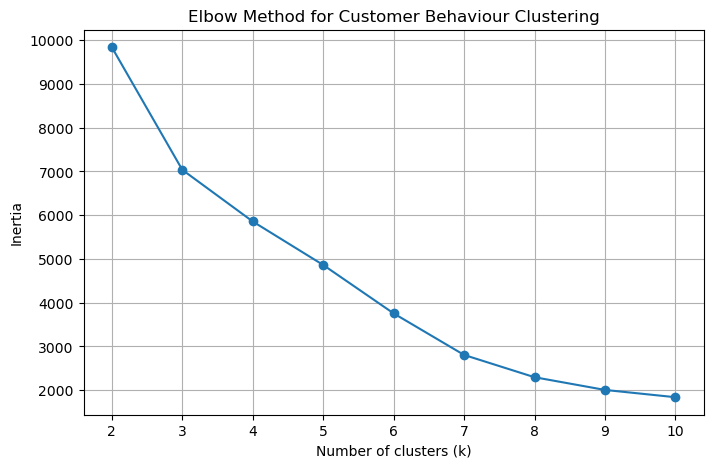

[(2, 9839.512698837627),
 (3, 7037.2218070513545),
 (4, 5856.451370755),
 (5, 4862.164063947193),
 (6, 3755.360579186077),
 (7, 2805.6470909036284),
 (8, 2296.256777132668),
 (9, 2005.7466700291466),
 (10, 1839.2732508068193)]

In [65]:
# Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_df)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Customer Behaviour Clustering")
plt.grid(True)
plt.show()

# Printing values for reporting
list(zip(k_range, inertia))


In [66]:
# Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_df)
    score = silhouette_score(X_cluster_df, labels)
    silhouette_scores[k] = score

# Displaying scores
for k, score in silhouette_scores.items():
    print(f"k = {k} → silhouette score = {score:.4f}")


k = 2 → silhouette score = 0.9167
k = 3 → silhouette score = 0.4206
k = 4 → silhouette score = 0.4211
k = 5 → silhouette score = 0.3656
k = 6 → silhouette score = 0.4244
k = 7 → silhouette score = 0.4094
k = 8 → silhouette score = 0.4146
k = 9 → silhouette score = 0.4225
k = 10 → silhouette score = 0.4248


In [67]:
#Fit final KMeans (k = 5)
from sklearn.cluster import KMeans

k_final = 5

kmeans = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(X_cluster_df)

behaviour_df["behaviour_cluster"] = cluster_labels


In [68]:
#Profiling each cluster
cluster_profile = (
    behaviour_df
    .groupby("behaviour_cluster")
    .agg({
        "total_sales_value": "mean",
        "avg_invoice_value": "mean",
        "invoice_count": "mean",
        "active_months": "mean",
        "relationship_years": "mean",
        "recency_days": "mean",
        "purchase_frequency": "mean",
        "unique_products": "mean"
    })
    .round(2)
)

cluster_profile


,total_sales_value,avg_invoice_value,invoice_count,active_months,relationship_years,recency_days,purchase_frequency,unique_products
behaviour_cluster,,,,,,,,
0,5.642490e+05,116488.29,5.43,3.64,0.67,1873.65,1.26,7.39
1,1.459552e+06,231081.87,9.27,6.54,2.20,318.48,1.32,10.95
2,7.157605e+08,9136.71,13938.00,91.00,7.45,1.00,153.16,94.00
3,1.258319e+07,46456.48,121.91,44.29,6.60,96.69,2.24,65.34
4,1.617258e+09,84296.18,2968.33,84.67,7.06,0.67,37.52,182.67


In [69]:
#Giving business names to clusters
cluster_names = {
    0: "Strategic High-Value",
    1: "Loyal Medium Buyers",
    2: "High Frequency Low Value",
    3: "Dormant / At Risk",
    4: "New Customers"
}

behaviour_df["cluster_name"] = behaviour_df["behaviour_cluster"].map(cluster_names)


In [70]:
# Linking clusters with Credit Risk
final_df = behaviour_df.merge(
    risk_output[["customerid", "final_risk_bucket", "risk_score"]],
    on="customerid",
    how="left"
)


In [71]:
#Analysis
pd.crosstab(
    final_df["cluster_name"],
    final_df["final_risk_bucket"],
    normalize="index"
).round(2)


final_risk_bucket,High Risk,Low Risk,Medium Risk
cluster_name,,,
Dormant / At Risk,0.34,0.57,0.10
High Frequency Low Value,0.00,0.00,1.00
Loyal Medium Buyers,0.23,0.62,0.15
New Customers,0.67,0.00,0.33
